In [2]:
import pandas as pd
import numpy as np


In [10]:
#on importe nos données

testA = np.asmatrix(pd.read_csv('testA',sep = ' ', header = 0))
testB = np.asmatrix(pd.read_csv('testB',sep = ' ', header = 0))
testC = np.asmatrix(pd.read_csv('testC',sep = ' ', header = 0))
trainA = np.asmatrix(pd.read_csv('trainA',sep = ' ', header = 0))
trainB = np.asmatrix(pd.read_csv('trainB',sep = ' ', header = 0))
trainC = np.asmatrix(pd.read_csv('trainC',sep = ' ', header = 0))


        


XA = testA[:,:2]
YA = np.asarray(testA[:,2])

XB = testB[:,:2]
YB = np.asarray(testB[:,2])

XC = testC[:,:2]
YC = np.asarray(testC[:,2])

trainXA = trainA[:,:2]
trainYA = np.asarray(trainA[:,2])

trainXB = trainB[:,:2]
trainYB = np.asarray(trainB[:,2])

trainXC = trainC[:,:2]
trainYC = np.asarray(trainC[:,2])



In [11]:
def implement_LDA(x,y):
    
    pi = np.sum(y)/y.shape[0]
    mu0 = 0
    mu1 = 0
    sigma = np.zeros((2,2))
    somme1 = 0
    somme2 = 0
    
    for i in range(y.shape[0]): 
        if y[i] == 0 :
            somme1 +=1
            mu0 += x[i]
        if y[i] == 1 :
            somme2 +=1 
            mu1 += x[i]
    mu0 /= somme1
    mu1 /= somme2
        
        
    for i in range(y.shape[0]):
        if y[i] == 0 :
            sigma += np.dot((x[i]-mu0).T,x[i]-mu0)
            
            
        if y[i] == 1 :
            sigma += np.dot((x[i]-mu1).T,x[i]-mu1)
            
        
            
    
    sigma /= y.shape[0]
                
                
            
    
    
    return mu0, mu1, pi, sigma

            

In [12]:
mu0,mu1,pi,sigma = implement_LDA(trainXA,trainYA)
print( "Data A \n","mu0 = ", mu0, "mu1 =", mu1, "pi =", pi, "\nsigma = ", sigma)
print("\n")
mu0,mu1,pi,sigma = implement_LDA(trainXB,trainYB)
print( "Data B \n","mu0 = ", mu0, "mu1 =", mu1, "pi =", pi, "\nsigma = ", sigma)
print("\n")
mu0,mu1,pi,sigma = implement_LDA(trainXC,trainYC)
print( "Data C \n","mu0 = ", mu0, "mu1 =", mu1, "pi =", pi, "\nsigma = ", sigma)


Data A 
 mu0 =  [[10.73248858 10.93983367]] mu1 = [[11.00911982  5.98309461]] pi = 0.47474747474747475 
sigma =  [[0.58154891 0.13525529]
 [0.13525529 0.82566886]]


Data B 
 mu0 =  [[10.58256756 11.17169818]] mu1 = [[11.2357268   6.08554784]] pi = 0.5477386934673367 
sigma =  [[1.64371135 0.6979725 ]
 [0.6979725  2.06522898]]


Data C 
 mu0 =  [[10.61324808 10.83448839]] mu1 = [[11.18463199  6.04249315]] pi = 0.4180602006688963 
sigma =  [[ 1.27886433 -0.06520325]
 [-0.06520325  1.66961839]]


w :  [[ 1.94605726]
 [-6.32209091]] et b  [[32.28839006]]
w :  [[ 1.68493863]
 [-3.03220187]] et b  [[7.87825245]]
w :  [[ 0.30105598]
 [-2.85835701]] et b  [[20.67365735]]


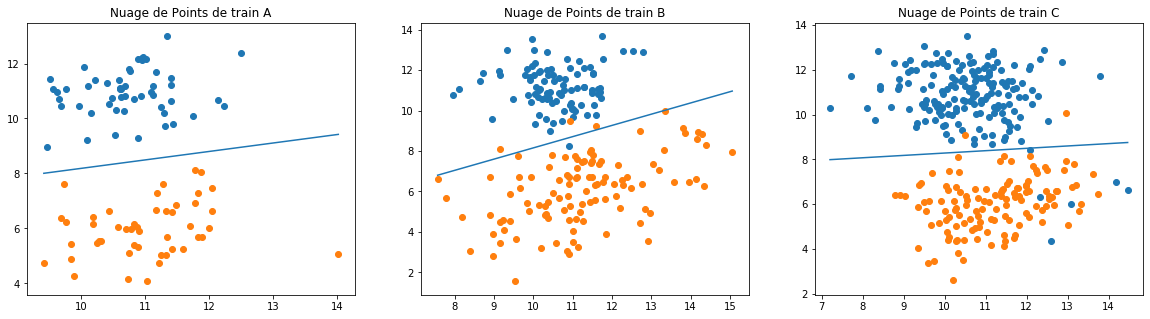

In [13]:
import matplotlib.pyplot as plt






# on calcule la droite d'équation P(Y=1|X) = 0.5, cela nous donné w.T x = - b, c'est pour ca que c'est une droite


def recup_parametres_LDA(x,y):
    
    mu0,mu1,pi,sigma = implement_LDA(x,y)
    w = np.dot( np.linalg.inv(sigma) , (mu1-mu0).T )
    b = 0.5*(np.dot(mu0, np.dot(np.linalg.inv(sigma), mu0.T)) - np.dot(mu1, np.dot(np.linalg.inv(sigma), mu1.T)) - np.log((1-pi)/pi))
    print("w : " ,w, "et b ",b)
    return w,b


    
def affichage(x,y,titre):
    
  
    l1 = [x[i,0] for i in range(x[:,0].shape[0]) if y[i] == 0 ]
    l2 = [x[i,1] for i in range(x[:,1].shape[0]) if y[i] == 0 ]

    l3 = [x[i,0] for i in range(x[:,0].shape[0]) if y[i] == 1 ]
    l4 = [x[i,1] for i in range(x[:,1].shape[0]) if y[i] == 1 ]

    plt.scatter(l1 , l2 )
    plt.scatter(l3 , l4  )
    
    
    w,b = recup_parametres_LDA(x, y)
    
    abscisse = np.linspace( np.min(x[:,0]) , np.max(x[:,0]),1000)
    ordonne = []
    for i in abscisse:
        ordonne.append(float((-np.asarray(b)-i*np.asarray(w)[0])/np.asarray(w)[1]))
    
    plt.plot(abscisse,ordonne)
    plt.title("Nuage de Points de " + titre)
    plt.show
    
    


figure = plt.figure(figsize = (20,5))
plt.subplot(1,3,1)
affichage(trainXA,trainYA, "train A")
plt.subplot(1,3,2)
affichage(trainXB,trainYB, "train B")
plt.subplot(1,3,3)
affichage(trainXC,trainYC, "train C")






In [8]:

def sigmoid(x):
    return (1/(1+np.exp(-x)))




def logistic_regression(X,Y,eps):
    i=0
    w0=0
    w = np.array([[0.01,0.02,0.03]])
    Xtilde = np.concatenate((np.ones((X.shape[0],1)), X ), axis = 1)
    
    while( np.linalg.norm(w-w0,ord=2) > eps and i< 1000 ):
        w0 = np.copy(w)
        
    
    
        eta = sigmoid(np.dot(Xtilde,w.T))
    
        gradient = np.dot(Xtilde.T,Y-eta)
    
    
        a = np.asarray([eta[i]*(1-eta[i]) for i in range(len(eta))])
        a = np.reshape(a,-1)
        a = np.diag(a)
    
        
        hessienne = - np.dot( Xtilde.T , np.dot (a, Xtilde))
        
        
        w = w -  np.dot(np.linalg.inv(hessienne), gradient).T
        i+=1
        
        
    return w

parame = logistic_regression(trainXA,trainYA,0.0001)
parame = np.reshape(np.asarray(parame),-1)
print("Pour trainA, on a : w  = ",parame[1:], "et b = ", parame[0])

parame = logistic_regression(trainXB,trainYB,0.0001)
parame = np.reshape(np.asarray(parame),-1)
print("Pour trainB, on a : w  = ",parame[1:], "et b = ", parame[0])

parame = logistic_regression(trainXC,trainYC,0.0001)
parame = np.reshape(np.asarray(parame),-1)
print("Pour trainC, on a : w  = ",parame[1:], "et b = ", parame[0])





LinAlgError: Singular matrix

LinAlgError: Singular matrix

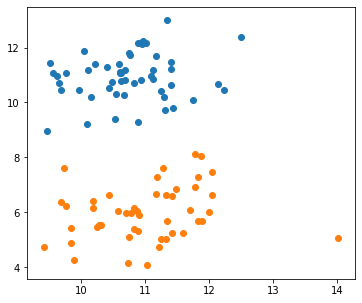

In [14]:
def affichage_lo(x,y,titre):
    
  
    l1 = [x[i,0] for i in range(x[:,0].shape[0]) if y[i] == 0 ]
    l2 = [x[i,1] for i in range(x[:,1].shape[0]) if y[i] == 0 ]

    l3 = [x[i,0] for i in range(x[:,0].shape[0]) if y[i] == 1 ]
    l4 = [x[i,1] for i in range(x[:,1].shape[0]) if y[i] == 1 ]

    plt.scatter(l1 , l2 )
    plt.scatter(l3 , l4  )
    
    
    
    w_recup =  np.reshape(np.asarray(logistic_regression(x,y,0.0001)),-1)
    b = w_recup[0]
    w0 = w_recup[1]
    w1 = w_recup[2]
    
    
    
    abscisse = np.linspace( np.min(x[:,0]) , np.max(x[:,0]),1000)
    ordonne = []
    
    for i in abscisse:
        ordonne.append(float((-b-i*w0)/w1))
        
        
    
    plt.plot(abscisse,ordonne)
    plt.title("Nuage de Points de " + titre)
    plt.show()
    



figure2 = plt.figure(figsize = (20,5))
plt.subplot(1,3,1)
affichage_lo(trainXA,trainYA, "train A")
figure = plt.figure(figsize = (20,5))
plt.subplot(1,3,2)
affichage_lo(trainXB,trainYB, "train B")
figure = plt.figure(figsize = (20,5))
plt.subplot(1,3,3)
affichage_lo(trainXC,trainYC, "train C")


In [15]:
def regression_lineaire(x,y):
    
    Xtilde = np.concatenate((np.ones((x.shape[0],1)), x ), axis = 1)


    w = np.dot(np.linalg.inv(np.dot(Xtilde.T,Xtilde)),np.dot(Xtilde.T,y))

    sigma = 0
    
    for i in range(y.shape[0]):
        sigma +=(y[i] - np.dot(Xtilde[i],w))**2
    sigma /= y.shape[0]
    
    
    return sigma, w


sigma, w = regression_lineaire(trainXA,trainYA)
w = np.reshape(np.asarray(w),-1)

print("Pour trainA, on a w = ",w[1:], "b = ", w[0],"et sigma = ", sigma )


sigma, w = regression_lineaire(trainXB,trainYB)
w = np.reshape(np.asarray(w),-1)

print("Pour trainB, on a w = ",w[1:], "b = ", w[0],"et sigma = ", sigma )



sigma, w = regression_lineaire(trainXC,trainYC)
w = np.reshape(np.asarray(w),-1)

print("Pour trainC, on a w = ",w[1:], "b = ", w[0],"et sigma = ", sigma )


Pour trainA, on a w =  [ 0.05422959 -0.17617385] b =  1.3983474631136472 et sigma =  [[0.02786639]]
Pour trainB, on a w =  [ 0.08195399 -0.14748374] b =  0.8879067527080227 et sigma =  [[0.04863916]]
Pour trainC, on a w =  [ 0.01674427 -0.15897741] b =  1.640302067637223 et sigma =  [[0.05561846]]


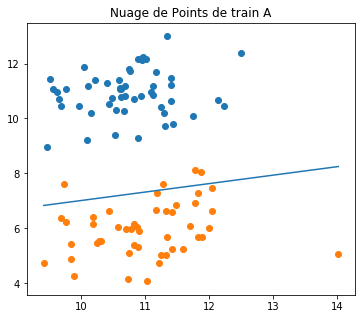

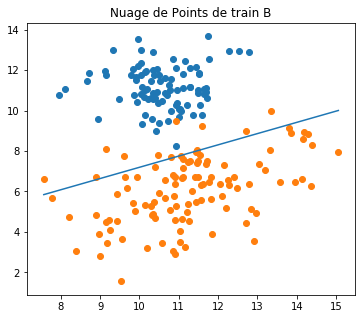

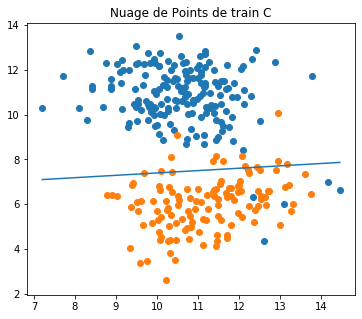

In [16]:
def affichage_lineaire(x,y,titre):
    
  
    l1 = [x[i,0] for i in range(x[:,0].shape[0]) if y[i] == 0 ]
    l2 = [x[i,1] for i in range(x[:,1].shape[0]) if y[i] == 0 ]

    l3 = [x[i,0] for i in range(x[:,0].shape[0]) if y[i] == 1 ]
    l4 = [x[i,1] for i in range(x[:,1].shape[0]) if y[i] == 1 ]

    plt.scatter(l1 , l2 )
    plt.scatter(l3 , l4  )
    
    
    
    sigma, w = regression_lineaire(x,y)
    w = np.reshape(np.asarray(w),-1)
    b = w[0]
    w0 = w[1]
    w1 = w[2]
    
    
    
    
    abscisse = np.linspace( np.min(x[:,0]) , np.max(x[:,0]),1000)
    ordonne = []
    
    for i in abscisse:
        ordonne.append(float( (1/w1) * (1 - np.sqrt( sigma*np.log(2/(np.pi*sigma))) -w0*i - b  )))
        
        
    
    plt.plot(abscisse,ordonne)
    plt.title("Nuage de Points de " + titre)
    plt.show()
    

figure2 = plt.figure(figsize = (20,5))
plt.subplot(1,3,1)
affichage_lineaire(trainXA,trainYA, "train A")
figure = plt.figure(figsize = (20,5))
plt.subplot(1,3,2)
affichage_lineaire(trainXB,trainYB, "train B")
figure = plt.figure(figsize = (20,5))
plt.subplot(1,3,3)
affichage_lineaire(trainXC,trainYC, "train C")



w :  [[ 1.94605726]
 [-6.32209091]] et b  [[32.28839006]]
Erreur pour trainA :  0.0
w :  [[ 1.68493863]
 [-3.03220187]] et b  [[7.87825245]]
Erreur pour trainB :  0.020100502512562814
w :  [[ 0.30105598]
 [-2.85835701]] et b  [[20.67365735]]
Erreur pour trainC :  0.026755852842809364
w :  [[ 0.11056449]
 [-5.08463643]] et b  [[41.80110394]]
w :  [[ 1.94605726]
 [-6.32209091]] et b  [[32.28839006]]
Erreur pour testA:  0.010101010101010102
w :  [[ 1.09646568]
 [-2.53077397]] et b  [[10.23172646]]
w :  [[ 1.68493863]
 [-3.03220187]] et b  [[7.87825245]]
Erreur pour testB :  0.04522613065326633
w :  [[-0.14335497]
 [-2.30149962]] et b  [[20.52247294]]
w :  [[ 0.30105598]
 [-2.85835701]] et b  [[20.67365735]]
Erreur pour testC :  0.04013377926421405
w :  [[ 1.94605726]
 [-6.32209091]] et b  [[32.28839006]]
w :  [[ 1.68493863]
 [-3.03220187]] et b  [[7.87825245]]
w :  [[ 0.30105598]
 [-2.85835701]] et b  [[20.67365735]]
w :  [[ 1.94605726]
 [-6.32209091]] et b  [[32.28839006]]
w :  [[ 1.6849

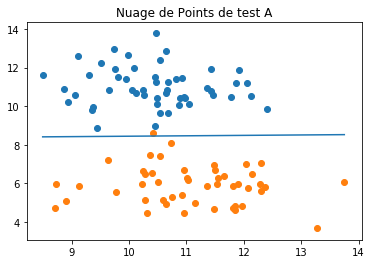

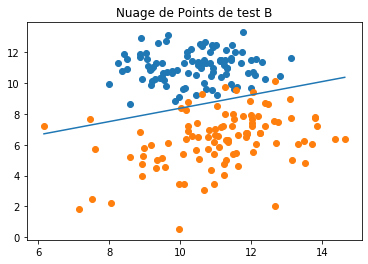

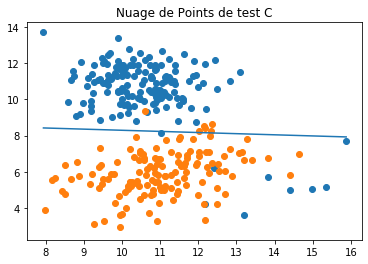

In [17]:


def error_LDA(x,y,z):
    w ,b = z

    predic = np.where(np.dot(x,w) > -b, 1, 0)
    
    error = 0
    for i in range(y.shape[0]):
        if y[i] != predic[i] :
            error +=1
        
    
    error /= y.shape[0]
    
    return error


#on appelle pour les erreurs du test avec les paramètres estimées lors du train
print("Erreur pour trainA : ",error_LDA(trainXA,trainYA, recup_parametres_LDA(trainXA, trainYA)))
print("Erreur pour trainB : ",error_LDA(trainXB,trainYB, recup_parametres_LDA(trainXB, trainYB)))
print("Erreur pour trainC : ",error_LDA(trainXC,trainYC , recup_parametres_LDA(trainXC, trainYC)))

plt.figure(1)
affichage(XA,YA, "test A")
print("Erreur pour testA: ",error_LDA(XA,YA, recup_parametres_LDA(trainXA, trainYA)))
plt.figure(2)
affichage(XB,YB, "test B")
print("Erreur pour testB : ",error_LDA(XB,YB, recup_parametres_LDA(trainXB, trainYB)))
plt.figure(3)
affichage(XC,YC, "test C")
print("Erreur pour testC : ",error_LDA(XC,YC, recup_parametres_LDA(trainXC, trainYC)))



l1 = [error_LDA(trainXA,trainYA, recup_parametres_LDA(trainXA, trainYA)), error_LDA(trainXB,trainYB, recup_parametres_LDA(trainXB, trainYB)), error_LDA(trainXC,trainYC , recup_parametres_LDA(trainXC, trainYC)),error_LDA(XA,YA, recup_parametres_LDA(trainXA, trainYA)), error_LDA(XB,YB, recup_parametres_LDA(trainXB, trainYB)), error_LDA(XC,YC, recup_parametres_LDA(trainXC, trainYC)) ]





Erreur pour trainA :  0.0
Erreur pour trainB :  0.01
Erreur pour trainC :  0.03
Erreur pour testA :  0.01
Erreur pour testB :  0.035
Erreur pour testC :  0.04666666666666667


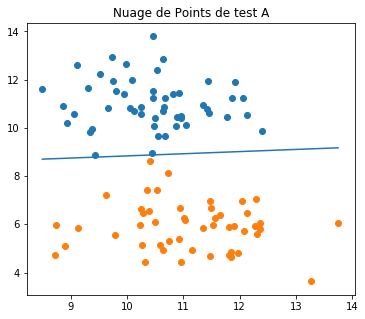

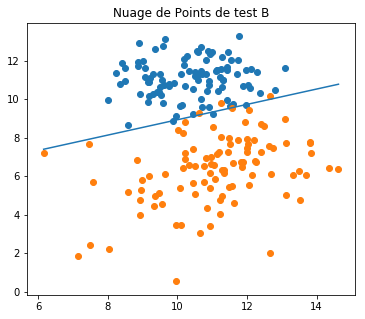

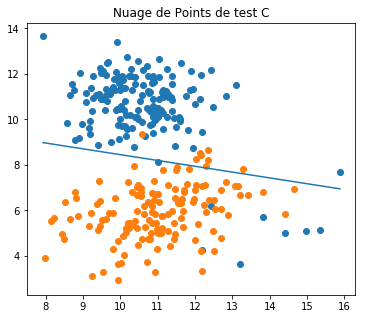

In [1226]:
def error_logistic(x,y,z):
    
    w_recup =  np.reshape(np.asarray(z),-1)
    b = w_recup[0]
    w = np.array([w_recup[1],w_recup[2]])
    

    predic = np.where(np.dot(x,w) > -b, 1, 0)
    predic = np.reshape(predic,-1)
    error = 0
    for i in range(y.shape[0]):
        if y[i] != predic[i] :
            error +=1
        
    
    error /= y.shape[0]
    
    return error


print("Erreur pour trainA : ",error_logistic(trainXA,trainYA,logistic_regression(trainXA,trainYA,0.0001)) )
print("Erreur pour trainB : ",error_logistic(trainXB,trainYB, logistic_regression(trainXB,trainYB,0.0001)))
print("Erreur pour trainC : ",error_logistic(trainXC,trainYC, logistic_regression(trainXC,trainYC,0.0001)))


print("Erreur pour testA : ",error_logistic(XA,YA, logistic_regression(trainXA,trainYA,0.0001)))
print("Erreur pour testB : ",error_logistic(XB,YB, logistic_regression(trainXB,trainYB,0.0001)))
print("Erreur pour testC : ",error_logistic(XC,YC,logistic_regression(trainXC,trainYC,0.0001)))


figure2 = plt.figure(figsize = (20,5))
plt.subplot(1,3,1)
affichage_lo(XA,YA, "test A")
figure = plt.figure(figsize = (20,5))
plt.subplot(1,3,2)
affichage_lo(XB,YB, "test B")
figure = plt.figure(figsize = (20,5))
plt.subplot(1,3,3)
affichage_lo(XC,YC, "test C")

l2 = [error_logistic(trainXA,trainYA,logistic_regression(trainXA,trainYA,0.0001)), error_logistic(trainXB,trainYB, logistic_regression(trainXB,trainYB,0.0001)), error_logistic(trainXC,trainYC, logistic_regression(trainXC,trainYC,0.0001)), error_logistic(XA,YA, logistic_regression(trainXA,trainYA,0.0001)), error_logistic(XB,YB, logistic_regression(trainXB,trainYB,0.0001)), error_logistic(XC,YC,logistic_regression(trainXC,trainYC,0.0001))]   





Erreur pour trainA :  0.04
Erreur pour trainB :  0.055
Erreur pour trainC :  0.06333333333333334
Erreur pour testA :  0.05
Erreur pour testB :  0.085
Erreur pour testC :  0.07


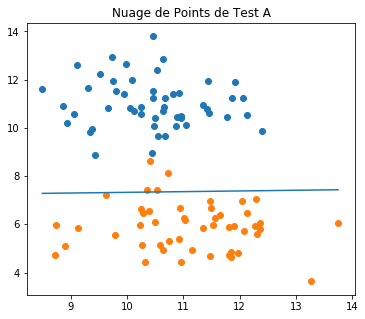

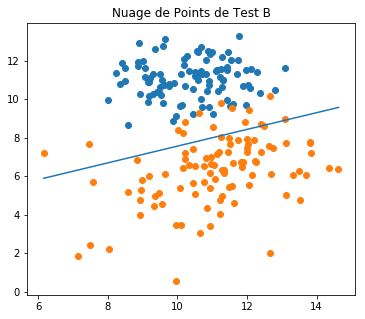

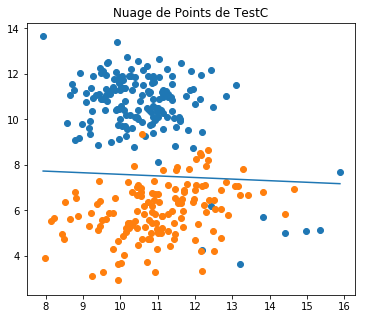

In [1265]:
def error_lineaire(x,y,z):
    
    sigma, w_recup = z
    w_recup = np.reshape(np.asarray(w_recup),-1)
    w = np.array([w_recup[1],w_recup[2]])
    b = w_recup[0]
    
    
    predic = np.where(np.dot(x,w) >  1 -b - np.sqrt(sigma*np.log(2/(np.pi*sigma))), 1, 0)
    predic = np.reshape(predic,-1)
    error = 0
    for i in range(y.shape[0]):
        if y[i] != predic[i] :
            error +=1
        
    
    error /= y.shape[0]
    
    return error


print("Erreur pour trainA : ",error_lineaire(trainXA,trainYA,regression_lineaire(trainXA,trainYA) ))
print("Erreur pour trainB : ",error_lineaire(trainXB,trainYB,regression_lineaire(trainXB,trainYB)))
print("Erreur pour trainC : ",error_lineaire(trainXC,trainYC,regression_lineaire(trainXC,trainYC)))


print("Erreur pour testA : ",error_lineaire(XA,YA,regression_lineaire(trainXA,trainYA)))
print("Erreur pour testB : ",error_lineaire(XB,YB,regression_lineaire(trainXB,trainYB)))
print("Erreur pour testC : ",error_lineaire(XC,YC,regression_lineaire(trainXC,trainYC)))



figure2 = plt.figure(figsize = (20,5))
plt.subplot(1,3,1)
affichage_lineaire(XA,YA, "Test A")
figure = plt.figure(figsize = (20,5))
plt.subplot(1,3,2)
affichage_lineaire(XB,YB, "Test B")
figure = plt.figure(figsize = (20,5))
plt.subplot(1,3,3)
affichage_lineaire(XC,YC, "TestC")

l3 = [error_lineaire(trainXA,trainYA,regression_lineaire(trainXA,trainYA) ), error_lineaire(trainXB,trainYB,regression_lineaire(trainXB,trainYB)), error_lineaire(trainXC,trainYC,regression_lineaire(trainXC,trainYC)), error_lineaire(XA,YA,regression_lineaire(trainXA,trainYA)), error_lineaire(XB,YB,regression_lineaire(trainXB,trainYB)), error_lineaire(XC,YC,regression_lineaire(trainXC,trainYC))    ]
    

In [1267]:
l4 =["trainA", "trainB", "trainC", "testA", "testB", "testC"]
pd.DataFrame({'Data set':l4, 'Erreur LDA' : l1 , 'Erreur Logistic' : l2, 'Erreur Linéaire': l3})



,Data set,Erreur LDA,Erreur Logistic,Erreur Linéaire
0,trainA,0.000000,0.000000,0.040000
1,trainB,0.020000,0.010000,0.055000
2,trainC,0.026667,0.030000,0.063333
3,testA,0.010000,0.010000,0.050000
4,testB,0.045000,0.035000,0.085000
5,testC,0.040000,0.046667,0.070000


In [1282]:
def implement_QDA(x,y):
    
    pi = np.sum(y)/y.shape[0]
    mu0 = 0
    mu1 = 0
    sigma = np.zeros((2,2))
    somme1 = 0
    somme2 = 0
    
    for i in range(y.shape[0]): 
        if y[i] == 0 :
            somme1 +=1
            mu0 += x[i]
        if y[i] == 1 :
            somme2 +=1 
            mu1 += x[i]
    mu0 /= somme1
    mu1 /= somme2
        
    sigma0 = np.zeros((2,2))
    sigma1 = np.zeros((2,2))
    n0, n1 = 0,0
    for i in range(y.shape[0]):
        if y[i] == 0 :
            sigma0 += np.dot((x[i]-mu0).T,x[i]-mu0)
            n0 +=1
            
            
        if y[i] == 1 :
            sigma1 += np.dot((x[i]-mu1).T,x[i]-mu1)
            n1 +=1
     
    sigma0 /= n0
    sigma1 /= n1
                
    
    return mu0, mu1, pi, sigma0, sigma1


In [1283]:
mu0,mu1,pi,sigma0,sigma1 = implement_QDA(trainXA,trainYA)
print( "Data A \n","mu0 = ", mu0, "mu1 =", mu1, "pi =", pi, "\nsigma0 = ", sigma0, "\nsigma1 = ", sigma1)
print("\n")
mu0,mu1,pi,sigma0,sigma1 = implement_QDA(trainXB,trainYB)
print( "Data B \n","mu0 = ", mu0, "mu1 =", mu1, "pi =", pi, "\nsigma0 = ", sigma0, "\nsigma1 = ", sigma1)
print("\n")
mu0,mu1,pi,sigma0,sigma1 = implement_QDA(trainXC,trainYC)
print( "Data C \n","mu0 = ", mu0, "mu1 =", mu1, "pi =", pi, "\nsigma0 = ", sigma0, "\nsigma1 = ", sigma1)


Data A 
 mu0 =  [[10.73248858 10.93983367]] mu1 = [[11.03264581  5.99294053]] pi = 0.48 
sigma0 =  [[0.46464757 0.0989291 ]
 [0.0989291  0.71324415]] 
sigma1 =  [[0.7220896  0.18267769]
 [0.18267769 0.93481714]]


Data B 
 mu0 =  [[10.58256756 11.17169818]] mu1 = [[11.24757662  6.095283  ]] pi = 0.55 
sigma0 =  [[0.76164392 0.05352417]
 [0.05352417 1.10741986]] 
sigma1 =  [[2.36576566 1.23147744]
 [1.23147744 2.84044647]]


Data C 
 mu0 =  [[10.6192273  10.83868653]] mu1 = [[11.18463199  6.04249315]] pi = 0.4166666666666667 
sigma0 =  [[ 1.28576019 -0.43356756]
 [-0.43356756  1.82602425]] 
sigma1 =  [[1.26768817 0.45714317]
 [0.45714317 1.44158652]]


In [1319]:
def recup_param_QDA(x,y):
    mu0,mu1,pi,sigma0,sigma1 = implement_QDA(x,y)
    
    c = -1/2*(np.linalg.inv(sigma1)- np.linalg.inv(sigma0))
    
    b = -(np.dot(mu0,np.linalg.inv(sigma0)) - np.dot(mu1,np.linalg.inv(sigma1)) )
    
    a = -1/2*(np.dot(mu1,np.dot(np.linalg.inv(sigma1),mu1.T)) - np.dot(mu0,np.dot(np.linalg.inv(sigma0),mu0.T))) - np.log((1-pi)/pi) - 1/2*(np.log(np.linalg.det(sigma1)/np.linalg.norm(sigma0)))                 
     
    
    return a, b, c


testa, testb ,testc = recup_param_QDA(trainXA,trainYA)
print("Pour trainA, on a :\n a = ", testa, "\nb = ", testb, "\n c = ", testc)

print("\n")
testa, testb ,testc = recup_param_QDA(trainXB,trainYB)
print("Pour trainB, on a :\n a = ", testa, "\nb = ", testb, "\n c = ", testc)

print("\n")
testa, testb ,testc = recup_param_QDA(trainXC,trainYC)
print("Pour trainC, on a :\n a = ", testa, "\nb = ", testb, "\n c = ", testc)




Pour trainA, on a :
 a =  [[88.07478595]] 
b =  [[-6.06874663 -8.90036349]] 
 c =  [[ 0.38038268 -0.0114482 ]
 [-0.0114482   0.15967316]]


Pour trainB, on a :
 a =  [[95.55838493]] 
b =  [[-8.53298501 -9.33925741]] 
 c =  [[0.38576513 0.08649925]
 [0.08649925 0.22570524]]


Pour trainC, on a :
 a =  [[54.66287237]] 
b =  [[-2.89831816 -7.01029496]] 
 c =  [[-0.02262538  0.24159404]
 [ 0.24159404 -0.09397328]]


In [1356]:
def error_QDA(x,y,z) : 
    a, b ,c = z


    d = np.asarray([a + np.dot(b,x[i].T) + np.dot(x[i],np.dot(c,x[i].T)) for i in range(y.shape[0])])
    d = np.reshape(d,-1)

    predic = np.where(d>0, 1,0)
    
    error = 0
    
    for i in range(y.shape[0]):
        if y[i] != predic[i] :
            error +=1
        
    
    error /= y.shape[0]
    
    return error



In [1359]:
print("Erreur pour trainA : ",error_QDA(trainXA,trainYA,recup_param_QDA(trainXA,trainYA) ))
print("Erreur pour trainB : ",error_QDA(trainXB,trainYB,recup_param_QDA(trainXB,trainYB)))
print("Erreur pour trainC : ",error_QDA(trainXC,trainYC,recup_param_QDA(trainXC,trainYC)))


print("Erreur pour testA : ",error_QDA(XA,YA,recup_param_QDA(trainXA,trainYA)))
print("Erreur pour testB : ",error_QDA(XB,YB,recup_param_QDA(trainXB,trainYB)))
print("Erreur pour testC : ",error_QDA(XC,YC,recup_param_QDA(trainXC,trainYC)))

l5 = [error_QDA(trainXA,trainYA,recup_param_QDA(trainXA,trainYA)), error_QDA(trainXB,trainYB,recup_param_QDA(trainXB,trainYB)), error_QDA(trainXC,trainYC,recup_param_QDA(trainXC,trainYC)),error_QDA(XA,YA,recup_param_QDA(trainXA,trainYA)), error_QDA(XB,YB,recup_param_QDA(trainXB,trainYB)), error_QDA(XC,YC,recup_param_QDA(trainXC,trainYC))  ]

pd.DataFrame({'Data set':l4, 'Erreur LDA' : l1 , 'Erreur Logistic' : l2, 'Erreur Linéaire': l3 , 'Erreur QDA': l5})


Erreur pour trainA :  0.0
Erreur pour trainB :  0.015
Erreur pour trainC :  0.02666666666666667
Erreur pour testA :  0.01
Erreur pour testB :  0.02
Erreur pour testC :  0.043333333333333335


,Data set,Erreur LDA,Erreur Logistic,Erreur Linéaire,Erreur QDA
0,trainA,0.000000,0.000000,0.040000,0.000000
1,trainB,0.020000,0.010000,0.055000,0.015000
2,trainC,0.026667,0.030000,0.063333,0.026667
3,testA,0.010000,0.010000,0.050000,0.010000
4,testB,0.045000,0.035000,0.085000,0.020000
5,testC,0.040000,0.046667,0.070000,0.043333


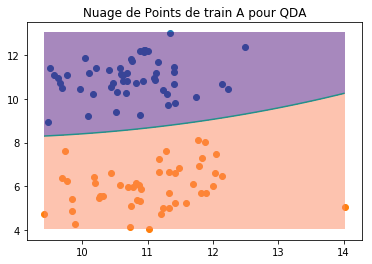

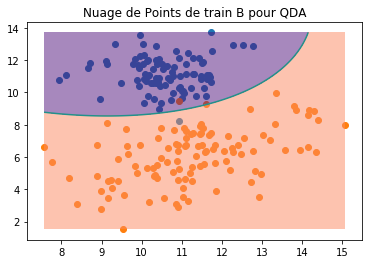

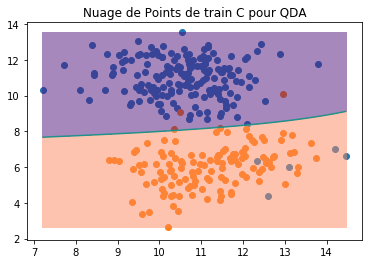

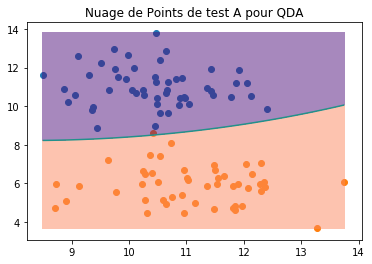

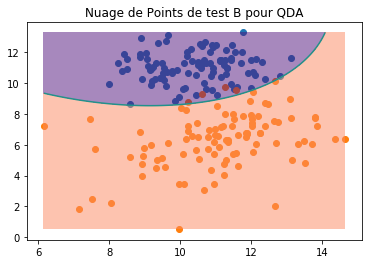

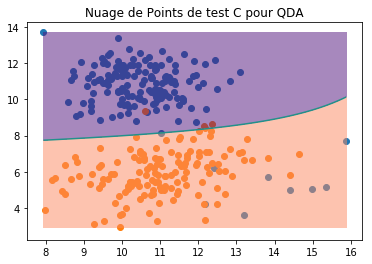

In [1421]:
def affichage_QDA(x,y,z,titre):
    
  
    l1 = [x[i,0] for i in range(x[:,0].shape[0]) if y[i] == 0 ]
    l2 = [x[i,1] for i in range(x[:,1].shape[0]) if y[i] == 0 ]

    l3 = [x[i,0] for i in range(x[:,0].shape[0]) if y[i] == 1 ]
    l4 = [x[i,1] for i in range(x[:,1].shape[0]) if y[i] == 1 ]

    plt.scatter(l1 , l2 )
    plt.scatter(l3 , l4  )
    
    
    
    a,b,c = z
    
    #meshgrid il le comprend comme l'abcisse et l'ordonne
    abscisse, ordonne = np.meshgrid(np.linspace(np.min(x[:, 0]), np.max(x[:, 0]), 1000), np.linspace(np.min(x[:, 1]), np.max(x[:, 1]), 1000))
    
    
    z = np.asarray(a + b[0,0]*abscisse + b[0,1]*ordonne + c[0,0]*((abscisse)**2) + (c[0,1] + c[1,0])*abscisse*ordonne + c[1,1]*((ordonne)**2) )
    
    
    
    plt.contour(abscisse, ordonne, z, 0)
    plt.contourf(abscisse,ordonne,z,0,cmap = plt.cm.magma, alpha = 0.5)
    
    
    plt.title("Nuage de Points de " + titre)
    plt.show()
    


affichage_QDA(trainXA,trainYA,recup_param_QDA(trainXA,trainYA), "train A pour QDA")
affichage_QDA(trainXB,trainYB,recup_param_QDA(trainXB,trainYB), "train B pour QDA")
affichage_QDA(trainXC,trainYC,recup_param_QDA(trainXC,trainYC), "train C pour QDA")

affichage_QDA(XA,YA, recup_param_QDA(trainXA,trainYA), "test A pour QDA")
affichage_QDA(XB,YB, recup_param_QDA(trainXB,trainYB),"test B pour QDA")
affichage_QDA(XC,YC, recup_param_QDA(trainXC,trainYC),"test C pour QDA")